# Machine Learning Model - Feature Engineering (Tổng hợp biến phái sinh)

In [ ]:
# Ví dụ dữ liệu Nominal và Ordinal
# Trình độ học vấn
arr = ['cấp 1', 'cấp 2', 'cấp 3', 'đại học', 'sau đại học'] # => sự sắp xếp nhất định
arr1 = ['nhân viên', 'nhóm trưởng', 'trưởng phòng', 'giám đốc chi nhánh', 'giám đốc vùng'] # => thứ tự nhất định
# Ordinal
# Nominal dữ liệu chữ nhưng ko có giá trị để sắp xếp
arr2 = ['bò sát', 'có vú', 'gia cầm', 'giáp xác']

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

In [195]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1.1. Check Data null

**We have to check all the value which is null value:**
- what is the name of columns
- how many time we have null value
- what is mode of ***Elements of Structured Data***

In [196]:
titanic.isnull().sum() 
#python count=1 if True else count=0 -->sum of all count+=1 (HOW IT WORKS)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**<h2>So you can see that:</h2>** 
- we have age: 177 null 
- we have embark_town 2 null
- ưe have deck 688 null 
- Our task now: how to fulfill data for this null using EDA also

## 1.2. Null Processing

|||Database.isnull().sum()||
|-|-|-|-|
|columns|embark_town|age|deck|
|isnull.sum()|2|177|688|


### Database.embark_town.isnull() processing

In [197]:
titanic['embark_town'].isnull().sum()
#check howmany value isnull

2

In [198]:
titanic['embark_town'].mode() #check mode

0    Southampton
dtype: object

In [199]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [200]:
titanic.embark_town.value_counts(dropna= False)
#Note that value_counts always igrone the NaN value therefore we have to choice dropna = False

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [201]:
filter1 = titanic['embark_town'].isnull()
titanic[filter1]
filter1= titanic['embark_town'].isnull()

In [202]:
titanic.embark_town= titanic.embark_town.fillna('Unknown')  #fulfill as Unknown value

In [203]:
 titanic['embark_town'].isnull().sum()

0

In [204]:
#YOu can see that we have: same fare and same calss also same who in this embark_town
f1 = titanic.who == 'woman'
f2 = titanic['class'] == 'First'
f3 = titanic.fare == 80

In [205]:
ser = titanic[f1 & f2 &f3]
ser
#We have to reduce the filters to find what is serials which can help to fullfil that null value

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Unknown,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Unknown,yes,True


In [206]:
ser = titanic['embark_town'][f1 & f2]
ser

1        Cherbourg
3      Southampton
11     Southampton
31       Cherbourg
52       Cherbourg
          ...     
856    Southampton
862    Southampton
871    Southampton
879      Cherbourg
887    Southampton
Name: embark_town, Length: 91, dtype: object

In [207]:
ser = titanic[f1 & f2]
ser.embark_town.value_counts()

Southampton    45
Cherbourg      43
Unknown         2
Queenstown      1
Name: embark_town, dtype: int64

In [208]:
ser.embark_town.value_counts().max()

45

In [209]:
ser.embark_town.value_counts().idxmax()

'Southampton'

In [210]:
titanic['embark_town'].fillna(ser.embark_town.value_counts().idxmax()) #fill however the titanic still did not update

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [211]:
titanic['embark_town'] = titanic['embark_town'].fillna(ser.embark_town.value_counts().idxmax()) #update tittanic

In [212]:
titanic.embark_town.value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
Unknown          2
Name: embark_town, dtype: int64

In [213]:
titanic['embark_town'].value_counts(dropna = False) #confrim all value.isvalue = False is done now

Southampton    644
Cherbourg      168
Queenstown      77
Unknown          2
Name: embark_town, dtype: int64

In [214]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [215]:
titanic = titanic.drop(columns ='embarked')

In [216]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

### Database.deck.isnull() processing

|||**Database.isnull().sum()**||
|-|-|-|-|
|columns|embark_town|age|**deck**|
|isnull.sum()|2|177|**688**|


In [217]:
titanic['deck'].isnull().sum() #python count=1 if True else count=0 -->sum of all count+=1
#Check how many value isnull

688

In [218]:
titanic['deck'].value_counts(dropna= False)
#Show more details about null value

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [219]:
titanic['deck'].mode()
#Check mode of deck: Elements of Structured Data

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

**Note that: The Elements of Structured Data is Category**

In [220]:
#Note that data is category: abcdefg 
#when you fullfill you have to fill the value in list of (abcdefg)
#We have to add more an category
#pandas cotegorical

In [221]:
titanic['deck'].cat.add_categories('Unknown')
#We wanna set unknown value firtly as defaults and then we will process later

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [222]:
titanic['deck']= titanic['deck'].cat.add_categories('Unknown')#update the Unknow in categorical elements of ESD

In [223]:
#Check ESD now
titanic['deck'].mode()

0    C
Name: deck, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [224]:
titanic['deck'].fillna('Unknown')
# fulfilling all Unknown value into the deck which we have isnull elements

0      Unknown
1            C
2      Unknown
3            C
4      Unknown
        ...   
886    Unknown
887          B
888    Unknown
889          C
890    Unknown
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [225]:
titanic['deck']= titanic['deck'].fillna('Unknown') 
#Update titanic after fullfiling deck

In [226]:
titanic['deck'].isnull().sum() #OK

0

**Because the EDA of deck is catergory therefore it is quite hard to process to find the fulfill value for isnull value**
[pandascategory](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

## 1.3 Special case: fillna for age:

|||Database.isnull().sum()||
|-|-|-|-|
|columns|embark_town|**age**|deck|
|isnull.sum()|2|**177**|688|

In [227]:
titanic['age'].isnull().sum()
#177 value which need to fillna

177

In [228]:
titanic['age'].value_counts(dropna= False)
#details ESD with NaN 177 values

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64

In [229]:
#Check mode ESD
titanic['age'].mode()

0    24.0
dtype: float64

**The mode of age's column is float, therefore we can consider to use the float.value to change NaN in this case.**

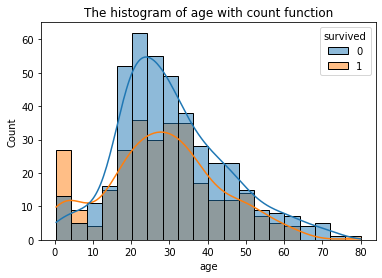

In [230]:
sns.histplot(titanic, x='age', kde=True,hue = 'survived')
# to know about what is distribution we have:
# 1- count
# 2- probability
# 3 - density 
plt.title('The histogram of age with count function');

**We can see that our childe (0-15) have survived quite high that is why we have to consider this point to separate the range of age database**

In [231]:
#Print: HOWMANY PERCENT of NaN value in age's serial
titanic['age'].isnull().sum()/len(titanic['age'])*100#20% quite big actually therefore you can not remove them 

19.865319865319865

<AxesSubplot:>

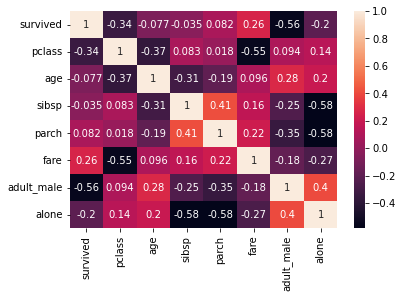

In [232]:
sns.heatmap(titanic.corr(), annot=True)

<AxesSubplot:xlabel='age', ylabel='fare'>

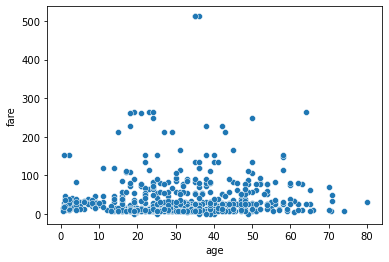

In [233]:
sns.scatterplot(data= titanic, x='age', y= 'fare')

In [234]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [235]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [236]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:xlabel='age', ylabel='sibsp'>

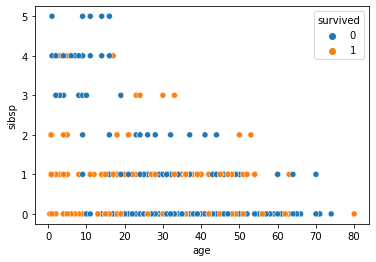

In [237]:
sns.scatterplot(data= titanic, x='age', y='sibsp',hue ='survived')

<AxesSubplot:xlabel='age', ylabel='parch'>

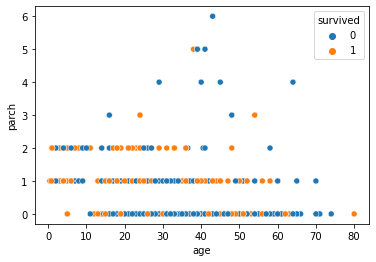

In [238]:
sns.scatterplot(data= titanic, x='age', y='parch',hue ='survived')

<AxesSubplot:xlabel='age', ylabel='who'>

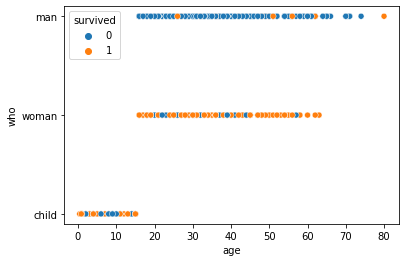

In [239]:
sns.scatterplot(data= titanic, x='age', y='who',hue ='survived')

<AxesSubplot:xlabel='parch', ylabel='age'>

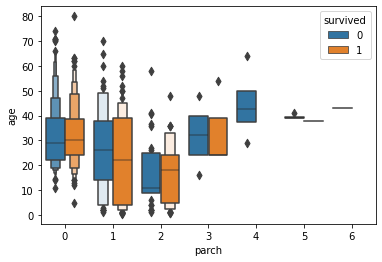

In [240]:
sns.boxenplot(data= titanic, x = 'parch', y = 'age',hue ='survived')

In [241]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg(lambda x: x.isnull().sum()/len(x)*100)

who    sibsp  parch
child  0      0          0.000000
              1          0.000000
              2          0.000000
       1      0          0.000000
              1          0.000000
              2          0.000000
       2      1          0.000000
              2          0.000000
       3      1          0.000000
              2          0.000000
       4      1          0.000000
              2          0.000000
       5      2          0.000000
man    0      0         26.097561
              1          0.000000
              2          0.000000
       1      0         11.864407
              1          9.523810
              2         20.000000
              3          0.000000
              4          0.000000
              5          0.000000
       2      0         15.384615
              1          0.000000
       3      1        100.000000
              2          0.000000
       4      1          0.000000
       8      2        100.000000
woman  0      0         21.4

In [242]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
who   sibsp parch                            
child 0     0        6  12.166667    0.000000
            1        8   6.052500    0.000000
            2        9   4.981111    0.000000
      1     0        5  13.900000    0.000000
            1       15   4.566667    0.000000
            2        7   5.274286    0.000000
      2     1        5   2.300000    0.000000
            2        1   9.000000    0.000000
      3     1        3   4.333333    0.000000
            2        4   6.250000    0.000000
      4     1        8   5.625000    0.000000
            2        8   6.125000    0.000000
      5     2        4   8.750000    0.000000
man   0     0      410  32.973597    0.260976
            1       12  38.583333    0.000000
            2        5  35.800000    0.000000
      1     0       59  32.701923    0.118644
            1       21  36.000000    0.095238
            2        5  30.750000    0.200000
            3        1  16.000000    0.000000
            4        2  52.000000    0.000000
            5        1  39.000000    0.000000
      2     0       13  31.181818    0.153846
            1        1  23.000000    0.000000
      3     1        1        NaN    1.000000
            2        1  19.000000    0.000000
      4     1        1  16.000000    0.000000
      8     2        4        NaN    1.000000
woman 0     0      121  31.084211    0.214876
            1       18  34.176471    0.055556
            2       15  26.833333    0.200000
            3        1  24.000000    0.000000
            4        1  29.000000    0.000000
            5        2  40.000000    0.000000
      1     0       59  33.355556    0.237288
            1       21  35.450000    0.047619
            2        7  31.333333    0.142857
            3        2  51.000000    0.000000
            4        1  45.000000    0.000000
            5        2  38.500000    0.000000
            6        1  43.000000    0.000000
      2     0        3  35.500000    0.333333
            1        1  24.000000    0.000000
            2        3  20.000000    0.000000
            3        1  24.000000    0.000000
      3     0        2  31.500000    0.000000
            1        3        NaN    1.000000
            2        2  23.500000    0.000000
      4     2        1  17.000000    0.000000
      5     2        1  16.000000    0.000000
      8     2        3        NaN    1.000000

In [243]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))# điền các gía trị bị thiếu bằng giá trị trung bình của nhóm

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [244]:
titanic['age'] = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [245]:
titanic['age'].isnull().sum()# Chia nhỏ quá thì bây h chia to hơn tí để điều được dữ liệu thiếu vào

11

In [246]:
titanic.groupby(['sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
sibsp parch                            
0     0      537  32.315390    0.000000
      1       38  29.647276    0.000000
      2       29  21.597586    0.000000
      3        1  24.000000    0.000000
      4        1  29.000000    0.000000
      5        2  40.000000    0.000000
1     0      123  32.251148    0.000000
      1       57  27.525439    0.000000
      2       19  21.579123    0.000000
      3        3  39.333333    0.000000
      4        3  49.666667    0.000000
      5        3  38.666667    0.000000
      6        1  43.000000    0.000000
2     0       16  31.991477    0.000000
      1        7   8.357143    0.000000
      2        4  17.250000    0.000000
      3        1  24.000000    0.000000
3     0        2  31.500000    0.000000
      1        7   4.333333    0.571429
      2        7  13.000000    0.000000
4     1        9   6.777778    0.000000
      2        9   7.333333    0.000000
5     2        5  10.200000    0.000000
8     2        7        NaN    1.000000

In [247]:
titanic['age'] = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [248]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            7
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [249]:
titanic['age'].isnull().sum() 

7

In [250]:
titanic[titanic['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
159,0,3,male,NaN,8,2,69.55,Third,man,True,Unknown,Southampton,no,False
180,0,3,female,NaN,8,2,69.55,Third,woman,False,Unknown,Southampton,no,False
201,0,3,male,NaN,8,2,69.55,Third,man,True,Unknown,Southampton,no,False
324,0,3,male,NaN,8,2,69.55,Third,man,True,Unknown,Southampton,no,False
792,0,3,female,NaN,8,2,69.55,Third,woman,False,Unknown,Southampton,no,False
846,0,3,male,NaN,8,2,69.55,Third,man,True,Unknown,Southampton,no,False
863,0,3,female,NaN,8,2,69.55,Third,woman,False,Unknown,Southampton,no,False


In [251]:
titanic['age'] = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))

In [252]:
titanic[titanic['who'] == 'child']['age'].mean() # do khar nawng song sot tre em cao hon nen buoc phai save thay vi bo di

6.369518072289157

In [253]:
titanic['age'] = titanic['age'].fillna(titanic[titanic['who'] == 'child']['age'].mean())

In [254]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [255]:
# Dien du lieu bi thieu bang tep sisp va parch lon nhat

## 1.3. Creating the datarange using CUT(Tao bien bang cach chia bin du lieu)

<AxesSubplot:xlabel='age', ylabel='Probability'>

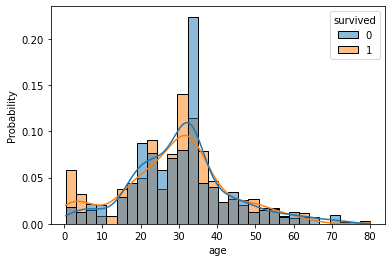

In [256]:
sns.histplot(data= titanic, x= 'age', hue= 'survived',kde = True, stat='probability',common_norm= False)

In [257]:
age_groups = [0,15,25,35,45,60,80,100]

In [258]:
pd.cut(titanic['age'], bins= age_groups)

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64, right]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [259]:
titanic['age_groups'] = pd.cut(titanic['age'], bins= age_groups) # Học lại bài phân nhóm

In [260]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,Unknown,Southampton,no,False,"(15, 25]"
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,"(35, 45]"
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,Unknown,Southampton,yes,True,"(25, 35]"
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,C,Southampton,yes,False,"(25, 35]"
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,Unknown,Southampton,no,True,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Second,man,True,Unknown,Southampton,no,True,"(25, 35]"
887,1,1,female,19.000000,0,0,30.0000,First,woman,False,B,Southampton,yes,True,"(15, 25]"
888,0,3,female,31.333333,1,2,23.4500,Third,woman,False,Unknown,Southampton,no,False,"(25, 35]"
889,1,1,male,26.000000,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,"(25, 35]"


In [261]:
# Tao bien bang bien chi bao (female & first class)

In [262]:
#adult_male

In [263]:
f1 = titanic['sex'] == 'female'
f2 = titanic['pclass'] < 3
f1 & f2

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

In [266]:
titanic ['female_from_2nd_class'] = (f1 & f2)

In [267]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,age_groups,female_from_2nd_class
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,Unknown,Southampton,no,False,"(15, 25]",False
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,Unknown,Southampton,yes,True,"(25, 35]",False
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,C,Southampton,yes,False,"(25, 35]",True
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,Unknown,Southampton,no,True,"(25, 35]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Second,man,True,Unknown,Southampton,no,True,"(25, 35]",False
887,1,1,female,19.000000,0,0,30.0000,First,woman,False,B,Southampton,yes,True,"(15, 25]",True
888,0,3,female,31.333333,1,2,23.4500,Third,woman,False,Unknown,Southampton,no,False,"(25, 35]",False
889,1,1,male,26.000000,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,"(25, 35]",False


In [268]:
# Tao bien bang tinh z-score (bien doi phan phoi)

<AxesSubplot:xlabel='fare', ylabel='Count'>

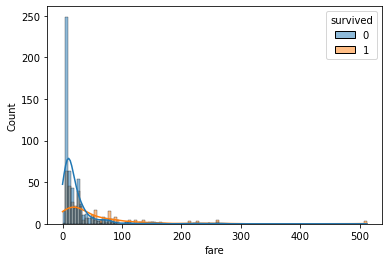

In [269]:
sns.histplot(data = titanic, x= 'fare', kde = True, hue = 'survived')

In [270]:
ser = np.log(titanic['fare'].where(titanic['fare'] > 0, 1)) # note log 1 = 0

<AxesSubplot:xlabel='fare', ylabel='Count'>

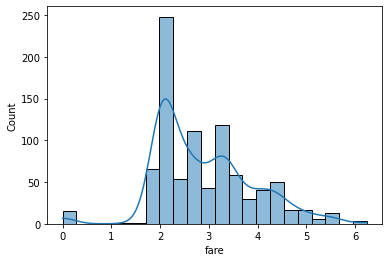

In [271]:
sns.histplot(np.log(titanic['fare'].where(titanic['fare'] > 0, 1)), kde =True)

In [272]:
# tinh Z score

In [273]:
ser.mean(), ser.std()

(2.893846237920027, 1.0028989322884627)

In [274]:
new_ser = (ser - ser.mean())/ser.std()

<AxesSubplot:xlabel='fare', ylabel='Count'>

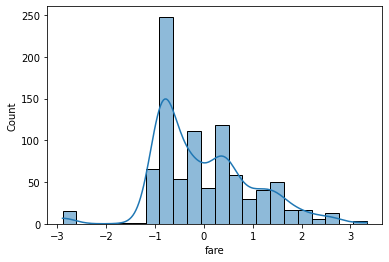

In [275]:
sns.histplot(new_ser, kde = True)

In [276]:
# move up to standard value (normal distribution) chuyển trọng tâm ấy mà

In [277]:
## Data Sampling
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,age_groups,female_from_2nd_class
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Unknown,Southampton,no,False,"(15, 25]",False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Unknown,Southampton,yes,True,"(25, 35]",False
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,"(25, 35]",True
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Unknown,Southampton,no,True,"(25, 35]",False


In [278]:
#Featureegineering
titanic['sex']=titanic.sex.map({'female':0, 'male':1})

In [279]:
titanic['sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int64

In [280]:
titanic.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [281]:
titanic['who']=titanic.who.map({'man':0, 'woman':1,'child':3})

In [282]:
titanic.adult_male = titanic.adult_male.astype(int)
titanic.alone = titanic.alone.astype(int)
titanic.female_from_2nd_class = titanic.female_from_2nd_class.astype(int)

In [285]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,age_groups,female_from_2nd_class
0,0,3,1,22.0,1,0,7.2500,Third,0,1,Unknown,Southampton,no,0,"(15, 25]",0
1,1,1,0,38.0,1,0,71.2833,First,1,0,C,Cherbourg,yes,0,"(35, 45]",1
2,1,3,0,26.0,0,0,7.9250,Third,1,0,Unknown,Southampton,yes,1,"(25, 35]",0
3,1,1,0,35.0,1,0,53.1000,First,1,0,C,Southampton,yes,0,"(25, 35]",1
4,0,3,1,35.0,0,0,8.0500,Third,0,1,Unknown,Southampton,no,1,"(25, 35]",0


In [284]:
titanic.to_csv('preprocessing.csv')

In [289]:
encoded = pd.get_dummies(titanic[['deck','embark_town','class','age_groups']])
# titanic = titanic.join(encoded)

In [290]:
titanic = titanic.join(encoded)

In [293]:
titanic.to_csv('preprocessing2.csv')

In [298]:
titanic = titanic.drop(columns = ['deck','embark_town','who','class','female_from_2nd_class','fare', 'alive'])

In [301]:
titanic = titanic.drop('age_groups',axis=1)

In [ ]:
# Tinh ti le survived

In [ ]:
# Random sampling

In [ ]:
# Sampling vs Bootstrap

In [ ]:
# Sampling bang scikit learn

In [4]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [310]:
X, y = titanic.drop(columns='survived'), titanic.survived

In [312]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

In [313]:
tree= DecisionTreeClassifier()

In [314]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [316]:
y_pred=tree.predict(x_test)

In [317]:
from sklearn import metrics

In [318]:
metrics.accuracy_score(y_pred,y_test)

0.8212290502793296

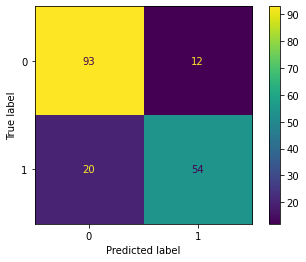

In [319]:
metrics.plot_confusion_matrix(tree,x_test,y_test)

* One-hot endcoding
* encoded = pd.get_dummies(titanic[['deck','embark_town','class','age_groups']])
* titanic = titanic.join(encoded)